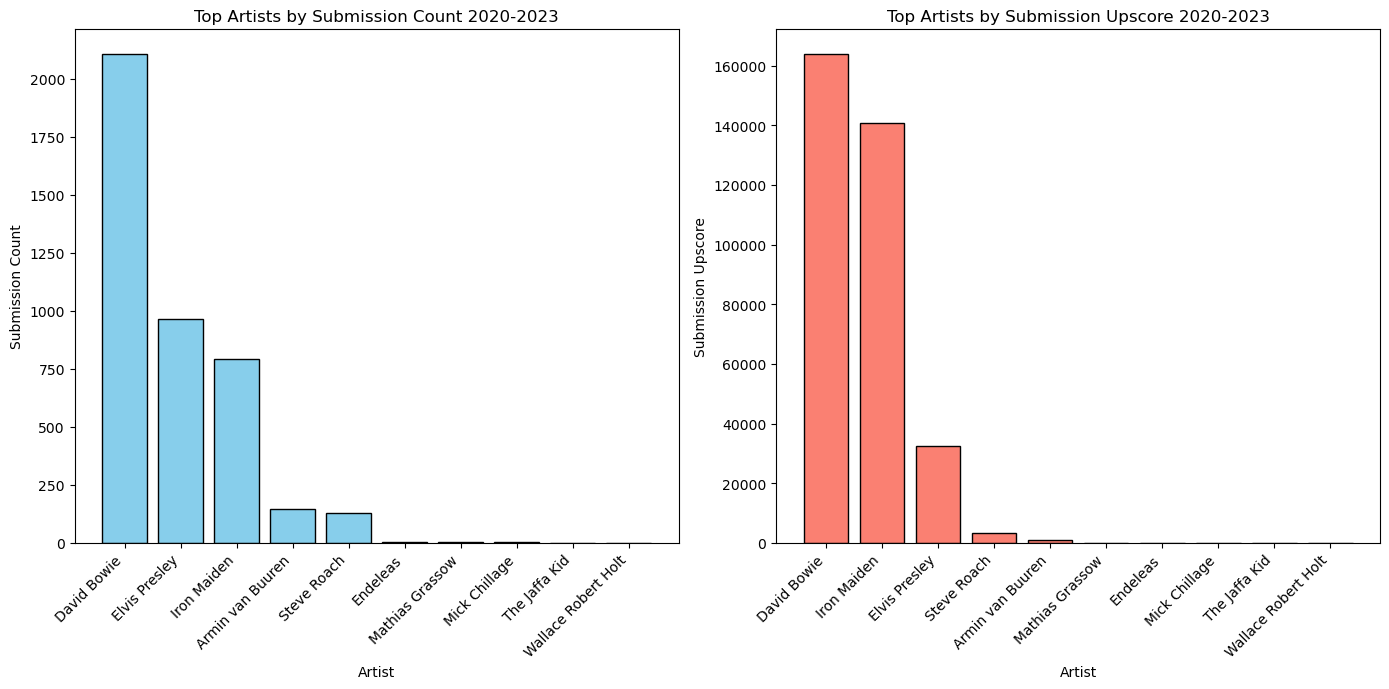

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into pandas data frames
df_2020 = pd.read_csv('top_artists_by_count_2020.csv')
df_2021 = pd.read_csv('top_artists_by_count_2021.csv')
df_2022 = pd.read_csv('top_artists_by_count_2022.csv')

# Combine the data frames
combined_df = pd.concat([df_2020, df_2021, df_2022], ignore_index=True)

# Group the data by 'keyword' (artist) and calculate the total submission counts and upscores for each artist
artist_comparisons = combined_df.groupby('keyword').agg({
    'submission_count': 'sum',
    'submission_upscore': 'sum'
}).sort_values(by='submission_count', ascending=False).reset_index()

# Plot for Artist Comparison based on Submission Counts and Submission Upscores
plt.figure(figsize=(14, 7))

# Plotting Submission Counts
plt.subplot(1, 2, 1)
top_submission_counts = artist_comparisons.sort_values(by='submission_count', ascending=False).head(10)
plt.bar(top_submission_counts['keyword'], top_submission_counts['submission_count'], color='skyblue', edgecolor='black')
plt.title('Top Artists by Submission Count 2020-2023')
plt.xlabel('Artist')
plt.ylabel('Submission Count')
plt.xticks(rotation=45, ha='right')

# Plotting Submission Upscores
plt.subplot(1, 2, 2)
top_submission_upscores = artist_comparisons.sort_values(by='submission_upscore', ascending=False).head(10)
plt.bar(top_submission_upscores['keyword'], top_submission_upscores['submission_upscore'], color='salmon', edgecolor='black')
plt.title('Top Artists by Submission Upscore 2020-2023')
plt.xlabel('Artist')
plt.ylabel('Submission Upscore')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('top_artists_by_count.png', format='png', dpi=300, bbox_inches='tight')

plt.show()


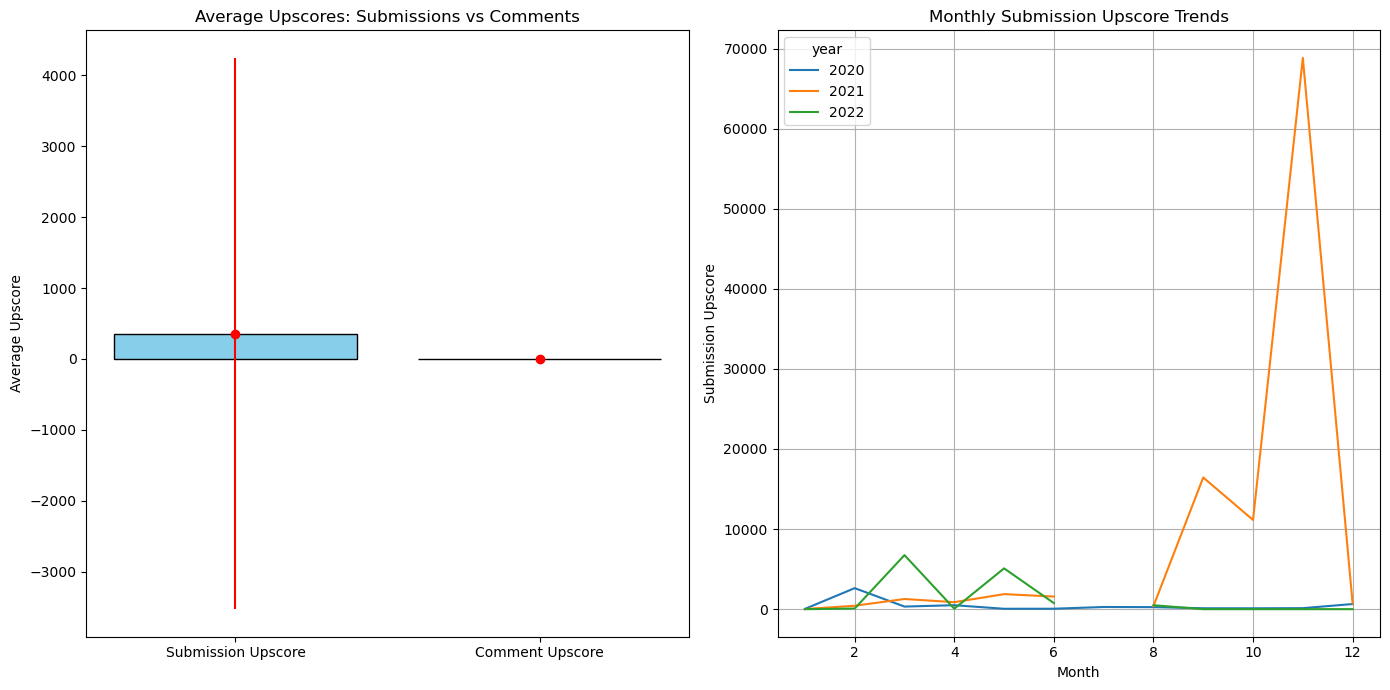

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into pandas data frames
df_upscore_2020 = pd.read_csv('top_artists_by_month_by_upscore_2020.csv')
df_upscore_2021 = pd.read_csv('top_artists_by_month_by_upscore_2021.csv')
df_upscore_2022 = pd.read_csv('top_artists_by_month_by_upscore_2022.csv')

# Combine the data frames
combined_upscore_df = pd.concat([df_upscore_2020, df_upscore_2021, df_upscore_2022], ignore_index=True)

# Descriptive Statistics plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Average upscore for submissions and comments
avg_upscore = combined_upscore_df[['submission_upscore', 'comment_upscore']].mean()
std_upscore = combined_upscore_df[['submission_upscore', 'comment_upscore']].std()

axes[0].bar(['Submission Upscore', 'Comment Upscore'], avg_upscore, color=['skyblue', 'lightgreen'], edgecolor='black')
axes[0].set_title('Average Upscores: Submissions vs Comments')
axes[0].set_ylabel('Average Upscore')
axes[0].errorbar(['Submission Upscore', 'Comment Upscore'], avg_upscore, yerr=std_upscore, fmt='o', color='red')

# Monthly trends for submission upscore
monthly_trends = combined_upscore_df.groupby(['year', 'month']).agg({'submission_upscore': 'sum'}).reset_index()
monthly_trends_pivot = monthly_trends.pivot(index="month", columns="year", values="submission_upscore")

monthly_trends_pivot.plot(ax=axes[1])
axes[1].set_title('Monthly Submission Upscore Trends')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Submission Upscore')
axes[1].grid(True)


plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('stat.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


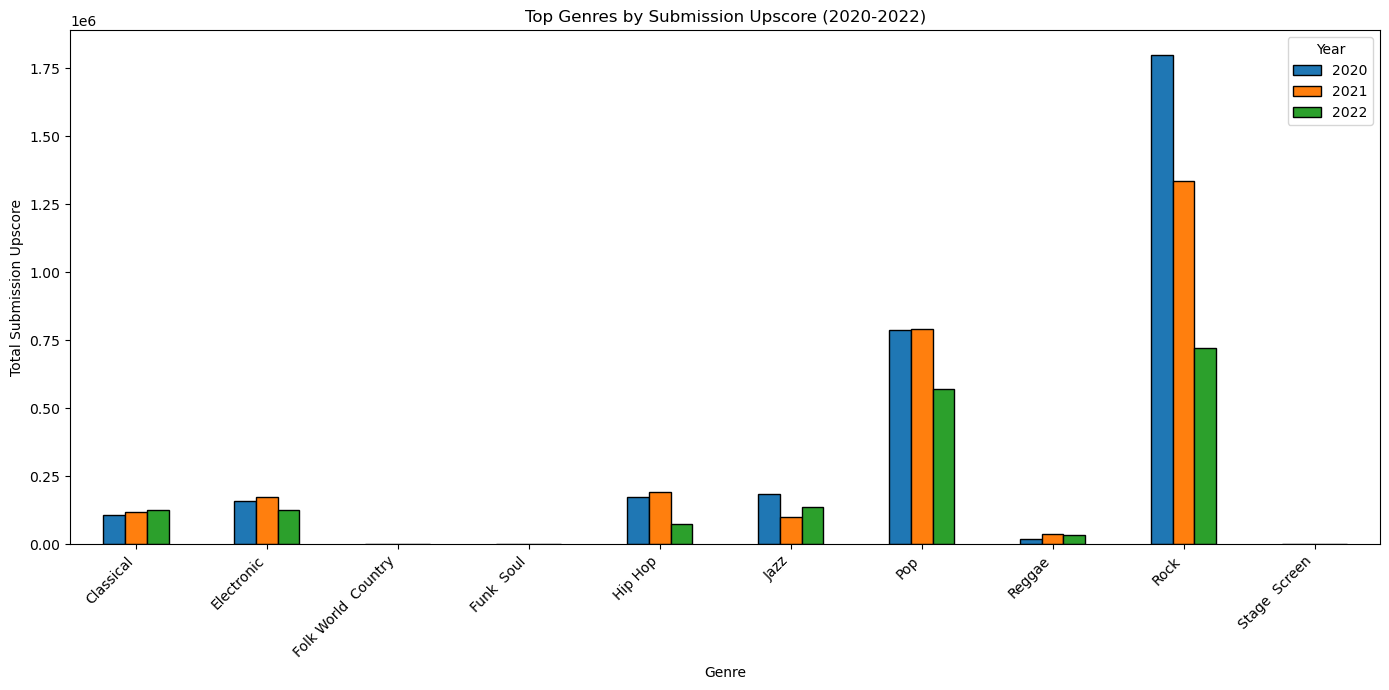

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into pandas data frames
df_genre_upscore_2020 = pd.read_csv('top_genres_by_upscore_2020.csv')
df_genre_upscore_2021 = pd.read_csv('top_genres_by_upscore_2021.csv')
df_genre_upscore_2022 = pd.read_csv('top_genres_by_upscore_2022.csv')

# Combine the data frames
combined_genre_upscore_df = pd.concat([df_genre_upscore_2020, df_genre_upscore_2021, df_genre_upscore_2022], ignore_index=True)

# Group by 'keyword' (which represents the genre) and 'year' to sum the upscore for each genre per year
genre_upscore_yearly = combined_genre_upscore_df.groupby(['keyword', 'year']).agg({
    'submission_upscore': 'sum'
}).reset_index()

# Pivot the data to have years as columns and genres (keywords) as rows
genre_upscore_pivot = genre_upscore_yearly.pivot(index='keyword', columns='year', values='submission_upscore').fillna(0)

# Now, we'll create a bar plot to compare the upscore for each genre over the three years
genre_upscore_pivot.plot(kind='bar', figsize=(14, 7), edgecolor='black')

# Enhancing the plot with titles and labels
plt.title('Top Genres by Submission Upscore (2020-2022)')
plt.xlabel('Genre')
plt.ylabel('Total Submission Upscore')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()

#Save the plot as a PNG file
plt.savefig('top_genres_by_upscore.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
